# Instacart Product recommendation

### About the company:
- Instacart is an American company that operates a grocery delivery and pick-up service in the United States and Canada. The company offers its services via a website and mobile app. The service allows customers to order groceries from participating retailers with the shopping being done by a personal shopper. 
- Once order is placed through the app or website,t hen an Instacart employee gets to work shopping for the items and, when they are done, they delivers groceries to door.
- Groceries priced on Instacart are often directly set by retailers.
- Shopping without a membership often results in higher delivery and service fees per order, which can range based on your order's subtotal and how fast you need your groceries delivered.
- If enrolled for an Express membership, the delivery is free on orders that are more than 35 dollars. Orders under 35 may be subject to a delivery fee between 3.99 and 9.99, depending on how soon customers like to receive it and based on Express membership (which lowers this fee).
- There are no additional fees that non-member shoppers are subjected to, including busy pricing, which is an extra charge that occurs when Instacart shoppers are facing more orders than usual, as well as free one-hour delivery (which normally comes at a surcharge). 

### About the dataset:

- The Instacart Online Grocery Shopping Dataset 2017 - This anonymized dataset contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, they provide between 4 and 100 of their orders, with the sequence of products purchased in each order. Dataset also has information about week and hour of day the order was placed, and a relative measure of time between orders.
- The dataset consists of information about 3.4 million grocery orders, distributed across 6 csv files.
    1. aisles.csv
    2. departments.csv
    3. order_products__prior.csv
    4. order_products__train.csv
    5. orders.csv
    6. products.csv
    7. sample_submission.csv


### Exploratory Data Analysis

In [1]:
# import necassary files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly
import plotly.express as px

In [3]:
#pip install --upgrade plotly

In [4]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Read datasets to pandas Dataframe

In [5]:
# aisles dataset
aisles = pd.read_csv('/content/gdrive/MyDrive/aisles.csv')

In [6]:
# orders, orders prior, orders train
orders = pd.read_csv('/content/gdrive/MyDrive/orders.csv')
order_products_train = pd.read_csv('/content/gdrive/MyDrive/order_products__train.csv')
order_products_prior = pd.read_csv('/content/gdrive/MyDrive/order_products__prior.csv')

In [7]:
# product dataset
products = pd.read_csv('/content/gdrive/MyDrive/products.csv')

In [8]:
# department dataset
departments = pd.read_csv('/content/gdrive/MyDrive/departments.csv')

### Merge files

In [9]:
# merge files
#order_products_prior1 = order_products_prior.drop('reordered',axis=1)
#products_merge = order_products_prior1.merge(products,on='product_id')
#orders1 = orders.drop(['eval_set'],axis=1)
#final_order = orders1.merge(products_merge,on='order_id')

In [10]:
#with open('/content/gdrive/MyDrive/merged_file1.csv', 'w') as merged_file1:
#  final_order.to_csv(merged_file1,index=False) 

In [11]:
final_file = pd.read_csv('/content/gdrive/MyDrive/merged_file1.csv')

### Peek into Data structure and layout of the files 

In [12]:
order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [14]:
order_products_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [15]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [16]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [17]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [18]:
final_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   product_name            object 
 9   aisle_id                int64  
 10  department_id           int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 2.7+ GB


In [19]:
final_file.isnull().sum()

order_id                        0
user_id                         0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_id                      0
add_to_cart_order               0
product_name                    0
aisle_id                        0
department_id                   0
dtype: int64

In [20]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

- The categorical features in 6 datasets are product name, department name, aisles section and eval set.
- The final merge file contains 32434489 records of orders, where each row is not represented by unique order id/user id/product id.
- Each row can be represented either by order_id + product_id or order_id + user_id + product_id.
- There are 206209 missing values in the feature days_since_prior_order which suggests they are the orders of first time buyers. 

## Analysis on Orders dataset

In [21]:
orders.sort_values(['order_id']).head()

order_id  user_id  ... order_hour_of_day  days_since_prior_order
1868044         1   112108  ...                10                     9.0
3355525         2   202279  ...                 9                     8.0
3417191         3   205970  ...                17                    12.0
2958007         4   178520  ...                 9                     7.0
2593373         5   156122  ...                16                     9.0

[5 rows x 7 columns]

#### Total number of orders?

In [22]:
orders.order_id.nunique()  # matches the shape of the orders table.

3421083

- There are 3421083 unique orders

#### Orders eval set split up

In [23]:
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [24]:
order_products_prior['order_id'].nunique() #not a unique column, depends on orders table.

3214874

- The prior in the eval set of the orders says that the records belongs to previous orders.
- The train and test classes are the  training and test data.
- Order Id is the unique ID which corresponds to each order made by the customers 
- Order number is the order sequence of each customer
- Order_dow - day of week when order was placed, order_hour_of_day - hour of the day, days_since_prior_order - relative time measure between orders for every customers
- User_Id is the anonimized randomly generated number which reperesents each customers.

#### How many unique users are in the data? How many times each user has ordered?

In [25]:
orders['user_id'].nunique()

206209

In [26]:
total_order_per_customer= orders['user_id'].value_counts()

In [27]:
total_order_per_customer[total_order_per_customer.sort_values(ascending=False).apply(lambda x: x>=50)]

53684     100
201623    100
50817     100
176951    100
88911     100
         ... 
961        50
46658      50
5680       50
84526      50
41108      50
Name: user_id, Length: 11464, dtype: int64

In [28]:
total_order_per_customer.loc[lambda x : x==100] 

53684     100
201623    100
50817     100
176951    100
88911     100
         ... 
143434    100
203256    100
107451    100
33495     100
68266     100
Name: user_id, Length: 1374, dtype: int64

In [29]:
total_order_per_customer.loc[lambda x : x==4] 

161169    4
89205     4
181639    4
200165    4
108492    4
         ..
24224     4
199509    4
32420     4
21310     4
196830    4
Name: user_id, Length: 23986, dtype: int64

In [30]:
total_order_per_customer.loc[lambda x : x < 4]

Series([], Name: user_id, dtype: int64)

##### There are 206209 unique users who has shopped using instacart.
##### So, on the whole there are purchase history of the users with minimum of 4 and maximum of 100 transactions (which could be capped value)
##### There are 1374 users who have shopped 100 times and 23986 users who have shopped 4 times.

#### What is order number?

In [31]:
orders[orders.user_id == 202279]

order_id  user_id  ... order_hour_of_day  days_since_prior_order
3355523   2894949   202279  ...                 9                     NaN
3355524   1500071   202279  ...                13                    20.0
3355525         2   202279  ...                 9                     8.0
3355526   3058248   202279  ...                14                    30.0
3355527   2808715   202279  ...                13                     9.0
3355528    132412   202279  ...                 9                    30.0
3355529   2382766   202279  ...                14                    24.0
3355530    104690   202279  ...                10                    30.0
3355531   1050357   202279  ...                14                    30.0

[9 rows x 7 columns]

- Order number is a feature which says how many times a user purchased. 
- Here, the User id 202279 has purchased 9 times where order_num 1 is always the first transaction of the user and hence days_since_prior_order is Nan.
- The most recent purchase is marked as 'train' in the eval set.

#### Max and Min of order_number?


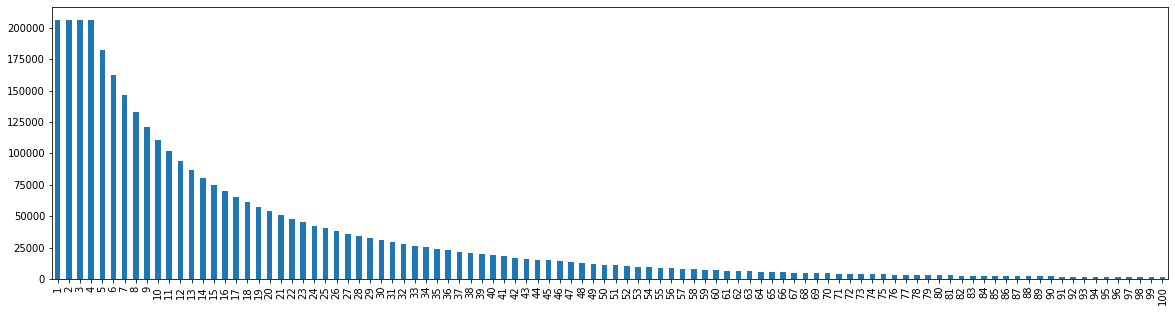

In [32]:
plt.figure(figsize=(20,5))
orders.order_number.value_counts().plot(kind='bar')
plt.show()

- This count matches with total transactions of a user which is between 4 and 100, where 206209 users shop 4 times and 1374 users shops 100 times.

## Analysis on Day of week and hour of day of the customer orders
#### On which day of the week customers order?

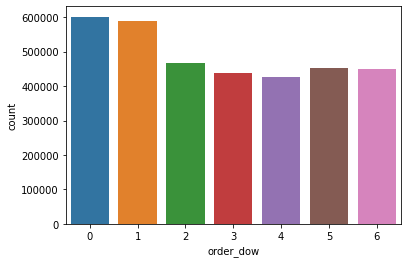

In [33]:
sns.countplot(x=orders['order_dow']);

- Most orders are placed on day 0 and 1, which possibly could be Sunday and Monday / weekends. 

#### How many users have shopped on both day 0 and day 1?

In [34]:
users_bought_on_day0 = orders[orders['order_dow']==0].groupby('user_id')['order_id'].count()
users_bought_on_day1 = orders[orders['order_dow']==1].groupby('user_id')['order_id'].count()

In [35]:
users_bought_on_0_1 = list(set(users_bought_on_day0.index).intersection(set(users_bought_on_day1.index)))

In [36]:
print('Number of unique users who had purchased on day 0 and 1 together is',len(users_bought_on_0_1))

Number of unique users who had purchased on day 0 and 1 together is 118437


#### Do the 1374 customers who shopped 100 times belong to users_bought_on_0_1?

In [37]:
users_bought_100_times = total_order_per_customer.loc[lambda x : x==100].index
len(set(users_bought_on_0_1).intersection(set(users_bought_100_times)))

1232

- There are 118437 users who had shopped on both day 0 and day 1 (as most of the transactions are on day 0 and 1).
- Out of 1374 users who have shopped 100 times, 1232 users have shopped on both day 0 and day 1

#### On which time of the day customers order?

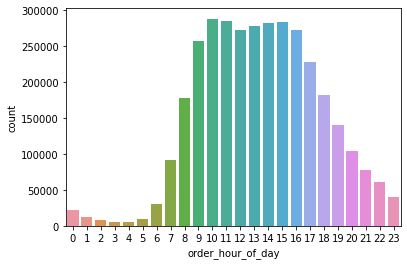

In [38]:
sns.countplot(x=orders['order_hour_of_day']);

- Most orders are between 8.00-18.00 hours of the day.

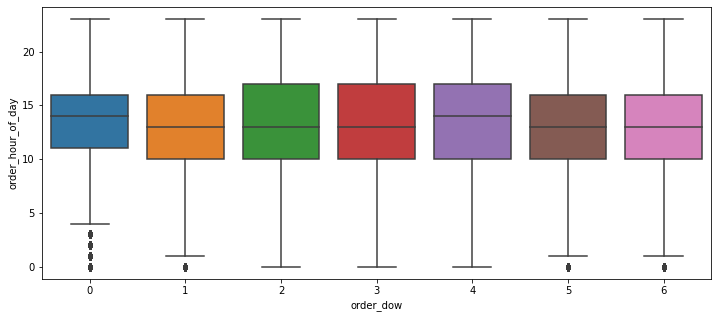

In [39]:
plt.figure(figsize=(12,5))
sns.boxplot(x = "order_dow", y = "order_hour_of_day", data=orders);

- On all days of week, 50% of orders are placed between 10.00 to 16.00 hours  

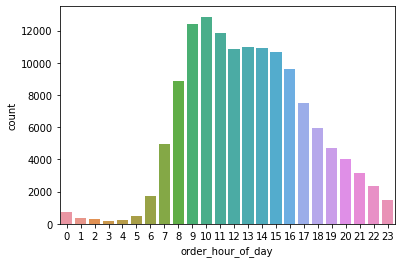

In [40]:
sns.countplot(x=orders[orders.user_id.isin(users_bought_100_times)]['order_hour_of_day']);

- Most of the frequent buyers shops between 9 to 12. 

#### Analysis on days_since_prior_order 

In [41]:
# days_since_prior_order has missing values
orders.isnull().sum()/len(orders)

order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    0.060276
dtype: float64

In [42]:
# Subsetting prior as it has the previous order history which could be nan if the customers order for the first
orders[orders['eval_set'] == 'prior'].isnull().sum()/len(orders)

order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    0.060276
dtype: float64

In [43]:
orders['days_since_prior_order'].unique()

array([nan, 15., 21., 29., 28., 19., 20., 14.,  0., 30., 10.,  3.,  8.,
       13., 27.,  6.,  9., 12.,  7., 17., 11., 22.,  4.,  5.,  2., 23.,
       26., 25., 16.,  1., 18., 24.])

- The maximum time taken by the customers to repurchase is within 30 days.
- The missing value in days_since_prior_order suggests that the customers are the first time shoppers. 
- Hence, imputing it to -999 inplace of missing values. 

In [44]:
# imputing first time orders
orders['days_since_prior_order']=orders['days_since_prior_order'].fillna(-999)
final_file['days_since_prior_order']=final_file['days_since_prior_order'].fillna(-999)

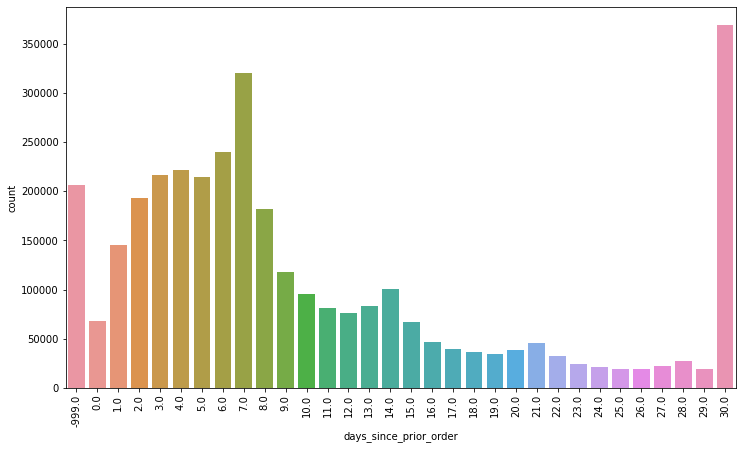

In [45]:
plt.figure(figsize=(12,7))
sns.countplot(x=orders['days_since_prior_order'])
plt.xticks(rotation='vertical');

##### The plot shows that how frequently shoppers purchase.
##### There are shoppers who purchase same day, everyday, weekly, bi-weekly, monthly also. 
##### It is seen that most of the shoppers shop monthly(could be more than a month) 

#### How frequently the most transacted users shops?

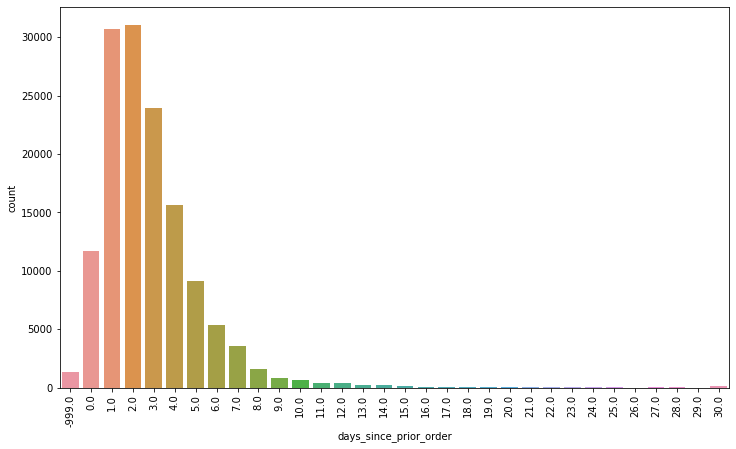

In [46]:
plt.figure(figsize=(12,7))
sns.countplot(x=orders[orders.user_id.isin(users_bought_100_times)]['days_since_prior_order'])
plt.xticks(rotation='vertical');

- The most shopped 1374 users buy products on same day, alternate days, two days once, three days once or within a week.
- It is clear that very few users who shop every month are part of most transacted users.
- Also, there are only few users who shop every week.

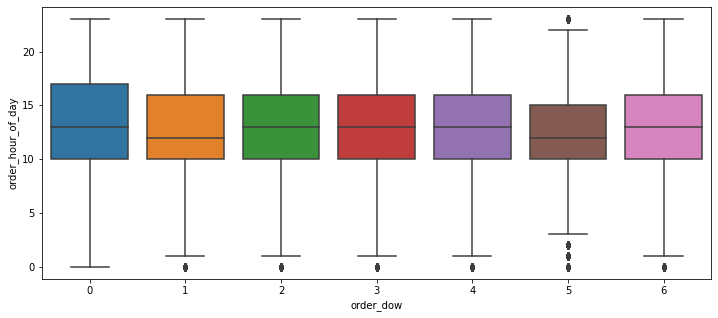

In [47]:
plt.figure(figsize=(12,5))
sns.boxplot(x = "order_dow", y = "order_hour_of_day", data=orders[orders.user_id.isin(users_bought_100_times)]);

- Most transacted customers also shops during mid of the day.

### Visualize the Treemap for departments and aisles

In [50]:
products1 = products.sort_values('product_id')
products1 = products1.merge(departments,on='department_id')
products1.head()

product_id  ... department
0           1  ...     snacks
1          16  ...     snacks
2          25  ...     snacks
3          32  ...     snacks
4          41  ...     snacks

[5 rows x 5 columns]

In [51]:
fig = px.treemap(products1, 
                 path=['department', 'product_name']
                )
fig.show()

#### How many products in each departments?
#### How many products in each aisle?

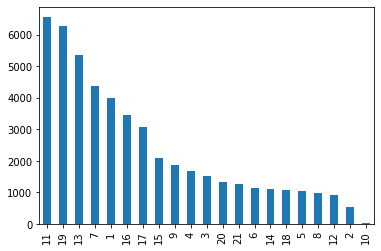

In [73]:
products.department_id.value_counts().plot(kind='bar');

In [74]:
departments

department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing

- The number of products in department personal care , snacks and pantry is more products than other departments, yet they are not the best selling products.
- There 1258 products in the missing department (could be miscellaneous).

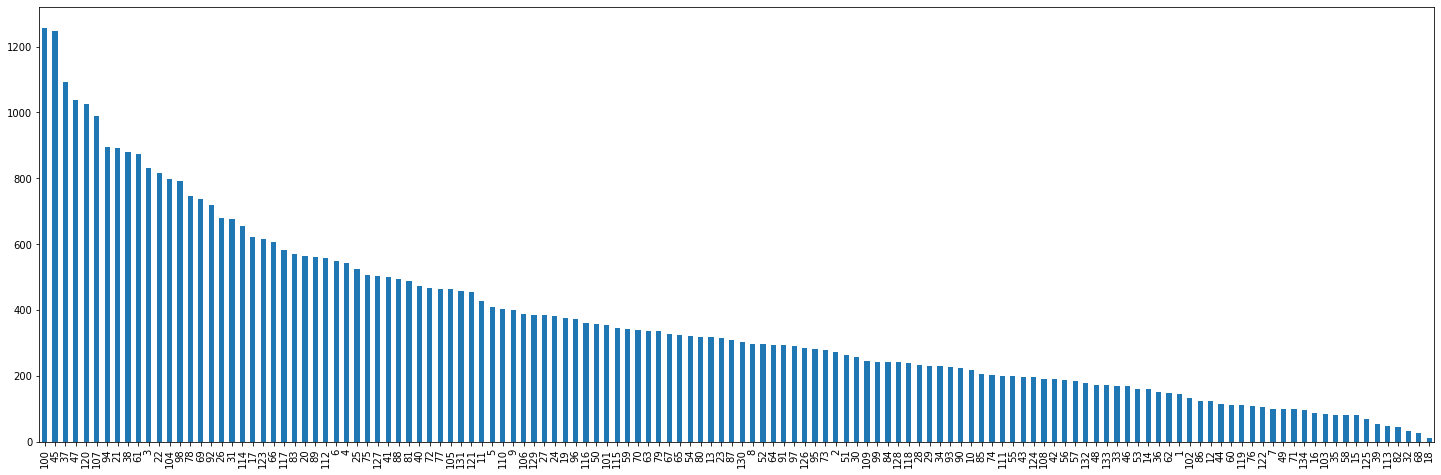

In [75]:
plt.figure(figsize=(25,8))
products.aisle_id.value_counts().plot(kind='bar');

In [76]:
aisles[aisles.aisle_id.isin([100,45,37])]

aisle_id            aisle
36        37    ice cream ice
44        45  candy chocolate
99       100          missing

- There are 1258 products from the missing aisle.
- Candy chocolate and ice cream ice aisle has many products.

## Analysis on prior data
#### How many unique products are shopped in prior data?

In [52]:
order_products_prior.head()

order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0

In [53]:
order_products_prior['product_id'].nunique(),order_products_train['product_id'].nunique()

(49677, 39123)

#### What are the best selling products?

In [54]:
top_10_best_selling_products_prior = order_products_prior['product_id'].value_counts().head(10).index
top_10_best_selling_products_train = order_products_train['product_id'].value_counts().head(10).index

In [55]:
orders_best_selling_products = final_file[final_file.product_id.isin(top_10_best_selling_products_prior)]

In [56]:
orders_best_selling_products.head(1)

order_id  user_id  ...  aisle_id  department_id
5   2398795        1  ...        24              4

[1 rows x 11 columns]

In [57]:
departments[departments.department_id.isin(orders_best_selling_products.department_id.unique())]

department_id  department
3               4     produce
15             16  dairy eggs

In [58]:
aisles[aisles.aisle_id.isin(orders_best_selling_products.aisle_id.unique())]

aisle_id                       aisle
23         24                fresh fruits
83         84                        milk
122       123  packaged vegetables fruits

In [59]:
products[products.product_id.isin(orders_best_selling_products.product_id.unique())]

product_id            product_name  aisle_id  department_id
13175       13176  Bag of Organic Bananas        24              4
16796       16797            Strawberries        24              4
21136       21137    Organic Strawberries        24              4
21902       21903    Organic Baby Spinach       123              4
24851       24852                  Banana        24              4
26208       26209                   Limes        24              4
27844       27845      Organic Whole Milk        84             16
47208       47209    Organic Hass Avocado        24              4
47625       47626             Large Lemon        24              4
47765       47766         Organic Avocado        24              4

- The top 10 best selling products are from the department produce and dairy eggs.
- They belong to the fresh fruits, milk, packed vegetables fruits sections.
- The top 10 best selling products are mostly fruits and milk.

#### Order count of best selling products

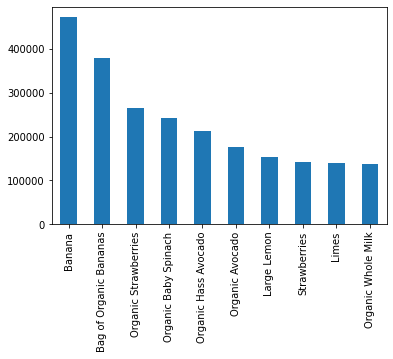

In [60]:
orders_best_selling_products.product_name.value_counts().plot(kind='bar');

- Bananas and Bag of organic bananas are the top sold products which was combinedly sold for 852015 times.
- Top 5 products ordered by the customers are Organic raw bananas, organic strawberries, organic baby spinach, banana, organic hass avocado 
- All 5 products belong to the same department - produce and aisle - fresh fruits and packed vegetables fruits section 

#### Do the frequent shoppers buy best selling products?

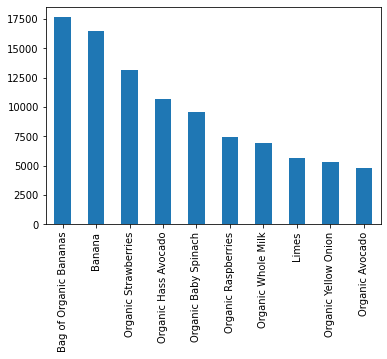

In [61]:
 final_file[final_file.user_id.isin(users_bought_100_times)]['product_name'].value_counts().head(10).plot(kind='bar');

In [62]:
 freq_buyers_top_10_prod = final_file[final_file.user_id.isin(users_bought_100_times)]['product_id'].value_counts().head(10).index
 products[products.product_id.isin(freq_buyers_top_10_prod)]

product_id            product_name  aisle_id  department_id
13175       13176  Bag of Organic Bananas        24              4
21136       21137    Organic Strawberries        24              4
21902       21903    Organic Baby Spinach       123              4
22934       22935    Organic Yellow Onion        83              4
24851       24852                  Banana        24              4
26208       26209                   Limes        24              4
27844       27845      Organic Whole Milk        84             16
27965       27966     Organic Raspberries       123              4
47208       47209    Organic Hass Avocado        24              4
47765       47766         Organic Avocado        24              4

- The most transacted shoppers also frequently buys the best sellers from the department produce.

#### At what day of week and time of week the best sellers are sold?
#### How frequently the best sellers are shopped?

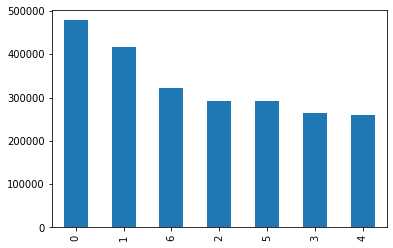

In [63]:
orders_best_selling_products.order_dow.value_counts().plot(kind='bar');

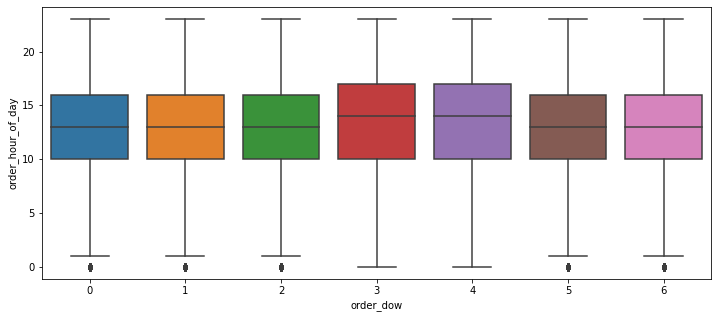

In [64]:
plt.figure(figsize=(12,5))
sns.boxplot(x = "order_dow", y = "order_hour_of_day", data=orders_best_selling_products);

- Best selling products are bought between 10 and 16 hours of the day

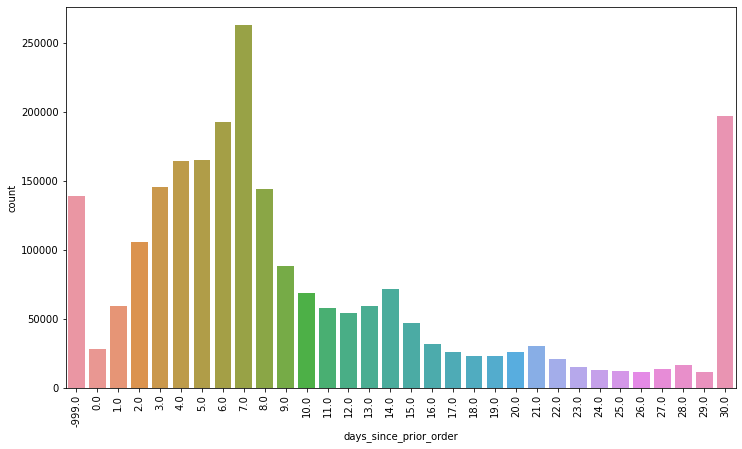

In [65]:
plt.figure(figsize=(12,7))
sns.countplot(x=orders_best_selling_products['days_since_prior_order'])
plt.xticks(rotation='vertical');

- The plot says that first time shoppers buy more best selling products.
- Mostly, Every week and every month the best selling products are shopped.

#### What products are shopped same day?

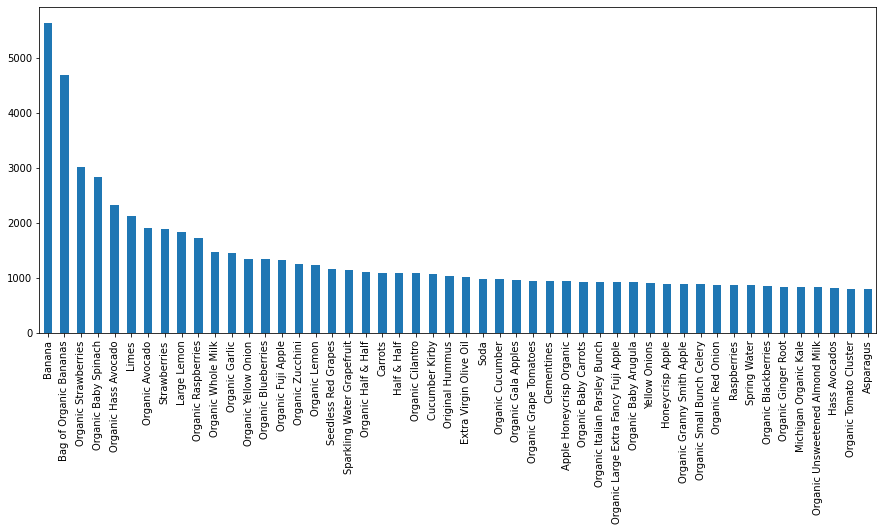

In [79]:
# Top 50 products shopped on the same day
plt.figure(figsize=(15,6))
final_file[final_file['days_since_prior_order'] == 0]['product_name'].value_counts().head(50).plot(kind='bar');

#### How many products have a customer purchased in a single order?

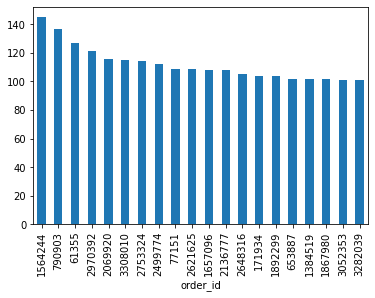

In [84]:
# Maximum number of products in a single order - top 20
final_file.groupby(['order_id'])['order_number'].count().nlargest(20).plot(kind='bar')

#### What are the top 5 products added to the cart first,second,third? Are the top 5 bought products repeated? 

In [67]:
first_3_products_in_cart=order_products_prior[order_products_prior['add_to_cart_order'].isin([1,2,3])]

CT_first_3_in_cart = pd.crosstab(first_3_products_in_cart['product_id'],first_3_products_in_cart['add_to_cart_order'])

In [68]:
CT_first_3_in_cart.head()

add_to_cart_order    1    2    3
product_id                      
1                  272  265  262
2                   11    4    6
3                   43   41   32
4                   14   22   27
5                    0    0    3

In [69]:
products[products['product_id'].isin(CT_first_3_in_cart[1].nlargest().index)]

product_id            product_name  aisle_id  department_id
13175       13176  Bag of Organic Bananas        24              4
21136       21137    Organic Strawberries        24              4
24851       24852                  Banana        24              4
27844       27845      Organic Whole Milk        84             16
47208       47209    Organic Hass Avocado        24              4

In [70]:
products[products['product_id'].isin(CT_first_3_in_cart[2].nlargest().index)]

product_id            product_name  aisle_id  department_id
13175       13176  Bag of Organic Bananas        24              4
21136       21137    Organic Strawberries        24              4
21902       21903    Organic Baby Spinach       123              4
24851       24852                  Banana        24              4
47208       47209    Organic Hass Avocado        24              4

In [71]:
products[products['product_id'].isin(CT_first_3_in_cart[3].nlargest().index)]

product_id            product_name  aisle_id  department_id
13175       13176  Bag of Organic Bananas        24              4
21136       21137    Organic Strawberries        24              4
21902       21903    Organic Baby Spinach       123              4
24851       24852                  Banana        24              4
47208       47209    Organic Hass Avocado        24              4

##### The most bought 5 products are repeated in the first three ordering sequence of the shopping.

#### How many products are bought only once throughout the prior data?

In [72]:
order_count = final_file.groupby('product_id')['order_id'].count()
order_count.sort_values(ascending=False).tail(132)

product_id
33263    2
33440    1
48461    1
44495    1
9342     1
        ..
23624    1
47680    1
45273    1
23653    1
14756    1
Name: order_id, Length: 132, dtype: int64

- There are 131 products which are bought only once in all the transactions.